In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [134]:
SpaceshipTitanicFilePath = "../input/spaceship-titanic/train.csv"
SpaceshipTitsnicDataFrame = pd.read_csv(SpaceshipTitanicFilePath)
SpaceshipTitsnicDataFrame.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [135]:
SpaceshipTitsnicDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [136]:
SpaceshipTitsnicDataFrame.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [137]:
SpaceshipTitsnicDataFrame["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
SpaceshipTitsnicDataFrame["Transported"].unique()

In [ ]:
SpaceshipTitsnicDataFrame["Destination"].unique()

In [ ]:
SpaceshipTitsnicDataFrame["VIP"].unique()

In [138]:
SpaceshipTitsnicDataFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

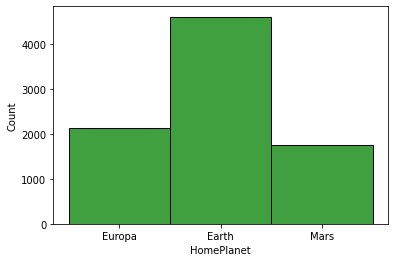

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(SpaceshipTitsnicDataFrame.HomePlanet, color='Green')

<AxesSubplot:xlabel='Destination', ylabel='Count'>

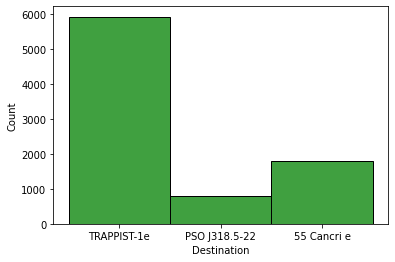

In [140]:
sns.histplot(SpaceshipTitsnicDataFrame.Destination, color='Green')

In [ ]:
sns.histplot(SpaceshipTitsnicDataFrame.Age, color='Green', kde=True)

Age grouping

In [158]:
ageList = []
for x in range(len(SpaceshipTitsnicDataFrame["Age"])):
    if (SpaceshipTitsnicDataFrame["Age"][x] >= 0) & (SpaceshipTitsnicDataFrame["Age"][x] <= 20):
        ageList.append(1)
    elif(SpaceshipTitsnicDataFrame["Age"][x] > 20) & (SpaceshipTitsnicDataFrame["Age"][x] <= 40):
        ageList.append(2)
    elif(SpaceshipTitsnicDataFrame["Age"][x] > 40) & (SpaceshipTitsnicDataFrame["Age"][x] <= 60):
        ageList.append(3)
    else:
        ageList.append(4)

        
SpaceshipTitsnicDataFrame["ageList"] = ageList
SpaceshipTitsnicDataFrame["ageList"]

0       2
1       2
2       3
3       2
4       1
       ..
8688    3
8689    1
8690    2
8691    2
8692    3
Name: ageList, Length: 8693, dtype: int64

In [141]:
SpaceshipTitsnicDataFrame["Transported"] = SpaceshipTitsnicDataFrame["Transported"].astype("int")

In [ ]:
sns.countplot(SpaceshipTitsnicDataFrame.Transported, color='Green')

In [142]:
SpaceshipTitsnicDataFrame["passGrp"] = SpaceshipTitsnicDataFrame.PassengerId.str.split("_", expand = True)[0]
SpaceshipTitsnicDataFrame["passGrp"]

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: passGrp, Length: 8693, dtype: object

In [143]:
SpaceshipTitsnicDataFrame["CabinDeck"] = SpaceshipTitsnicDataFrame.Cabin.str.split("/", expand = True)[0]
SpaceshipTitsnicDataFrame["CabinNum"] = SpaceshipTitsnicDataFrame.Cabin.str.split("/", expand = True)[1]
SpaceshipTitsnicDataFrame["CabinSide"] = SpaceshipTitsnicDataFrame.Cabin.str.split("/", expand = True)[2]

In [144]:
SpaceshipTitsnicDataFrame["CabinDeck"]

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: CabinDeck, Length: 8693, dtype: object

In [145]:
SpaceshipTitsnicDataFrame["CabinNum"]

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: CabinNum, Length: 8693, dtype: object

In [146]:
SpaceshipTitsnicDataFrame["CabinSide"] 

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: CabinSide, Length: 8693, dtype: object

In [147]:
SpaceshipTitsnicDataFrame.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'passGrp', 'CabinDeck', 'CabinNum', 'CabinSide'],
      dtype='object')

In [148]:
SpaceshipTitsnicDataFrame.drop(["PassengerId","Cabin"], axis = 1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passGrp,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,E,608,S


0       2
1       2
2       3
3       2
4       1
       ..
8688    3
8689    1
8690    2
8691    2
8692    3
Name: ageList, Length: 8693, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ageList', ylabel='count'>

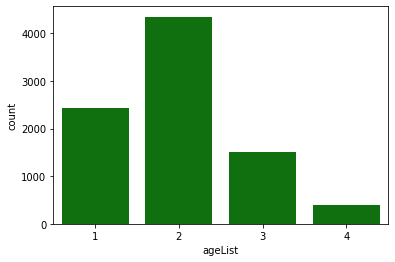

In [150]:
sns.countplot(SpaceshipTitsnicDataFrame.ageList, color='Green')

<AxesSubplot:xlabel='VIP', ylabel='ageList'>

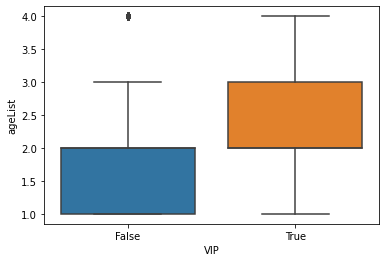

In [151]:
sns.boxplot(data = SpaceshipTitsnicDataFrame, y = "ageList", x = "VIP")

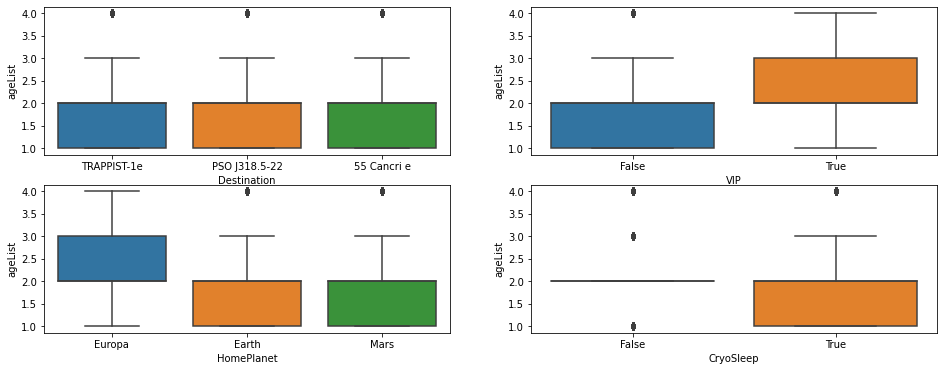

In [155]:
fix, ax = plt.subplots(2,2 , figsize = (16,6))
sns.boxplot(data = SpaceshipTitsnicDataFrame, y = "ageList", x = "Destination", ax = ax[0,0])
sns.boxplot(data = SpaceshipTitsnicDataFrame, y = "ageList", x = "VIP", ax = ax[0,1])
sns.boxplot(data = SpaceshipTitsnicDataFrame, y = "ageList", x = "HomePlanet", ax = ax[1,0])
sns.boxplot(data = SpaceshipTitsnicDataFrame, y = "ageList", x = "CryoSleep", ax = ax[1,1])
plt.show()

Text(0.5, 1.0, 'Corelation Matrix')

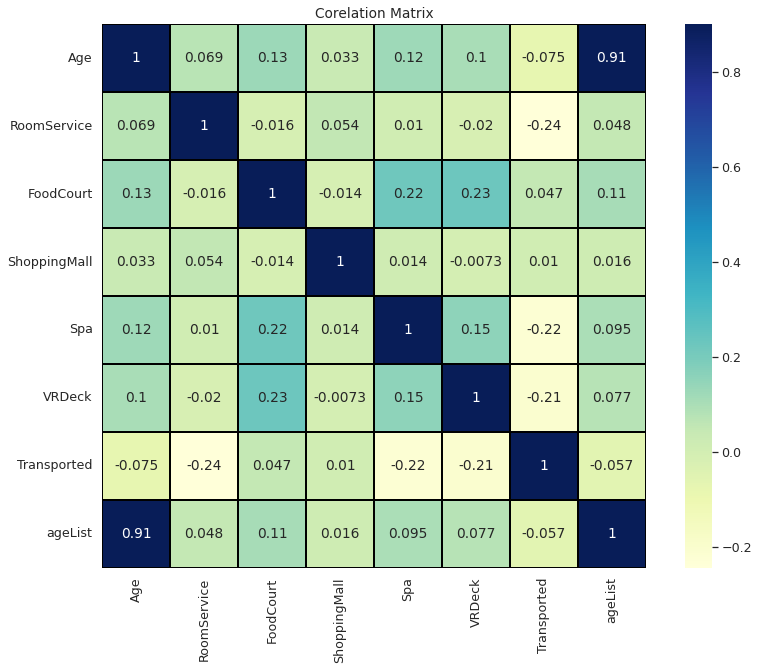

In [157]:
#Correlation maxtrix
cor = SpaceshipTitsnicDataFrame.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(cor,
            vmax=0.9,
            linewidths=0.02,
            square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Corelation Matrix')

In [ ]:
SpaceshipTitsnicDataFrame.dropna(axis=0, subset=["Destination", "Age"], inplace=True)
Features = ["PassengerId", "HomePlanet", "Cabin", "Destination", "Age", "VIP", "Name"]
X = SpaceshipTitsnicDataFrame[Features]
y = SpaceshipTitsnicDataFrame["Destination"]
print(X)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [ ]:
#one_hot_encoded_train_X = pd.get_dummies(train_X)
#one_hot_encoded_train_X.dropna()
train_X.describe

In [ ]:
one_hot_encoded_train_X.dtypes

In [ ]:
#one_hot_encoded_train_X.describe()

In [ ]:
#one_hot_encoded_train_X.dropna(axis = 0,subset = ["Age"], inplace = True)

In [ ]:
train_X.describe()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
SpaceshipTitanicModel = RandomForestRegressor(random_state = 1)
SpaceshipTitanicModel.fit(train_X, train_y)